## Location or Size: What Influences House Prices in Hong Kong?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Expand the column width so that the urls are not getting truncated without setting a max limit -> None
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv("data/hk-centaline-property-buy-clean.csv")

### Rank mean price per sq foot by area

In [4]:
# Mean price per sq foot by area
mean_price_by_area = df.groupby("address")["price_per_sq_foot_SA"].mean().sort_values(ascending=False)
mean_price_by_area

address
Peak                   61618.184001
Stanley                35346.804474
Deep Bay               34890.552695
Kowloon Station        33396.439511
Shouson Hill           33259.259259
                           ...     
Tuen Mun Ferry Pier     9361.597478
Tsing Lung Tau          9173.353864
Tai Shui Hang           8880.357559
Queen's Hill            8833.922261
Heng On                 7094.265840
Name: price_per_sq_foot_SA, Length: 161, dtype: float64

In [5]:
mean_price_by_area.shape

(161,)

### Bar chart to see the mean price per sq foot by area

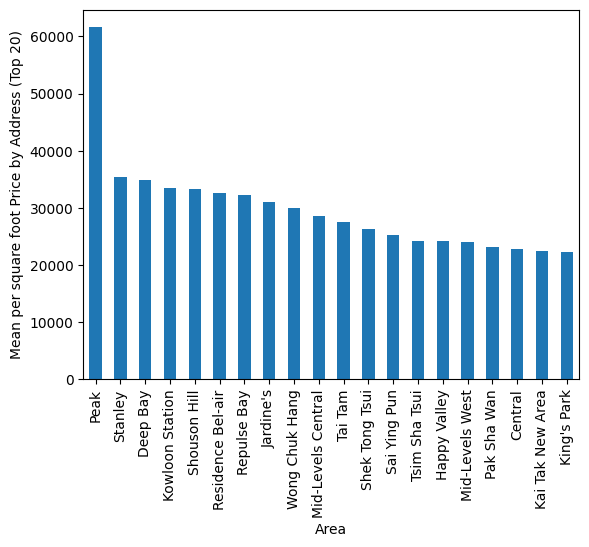

In [6]:
# Bar chart 
top_20_areas = mean_price_by_area.head(20)

top_20_areas.plot(
    kind = "bar",
    xlabel = "Area",
    ylabel = "Mean per square foot Price by Address (Top 20)"
);

plt.savefig("images/mean_price_per_sq_foot_by_area_top_20.png")

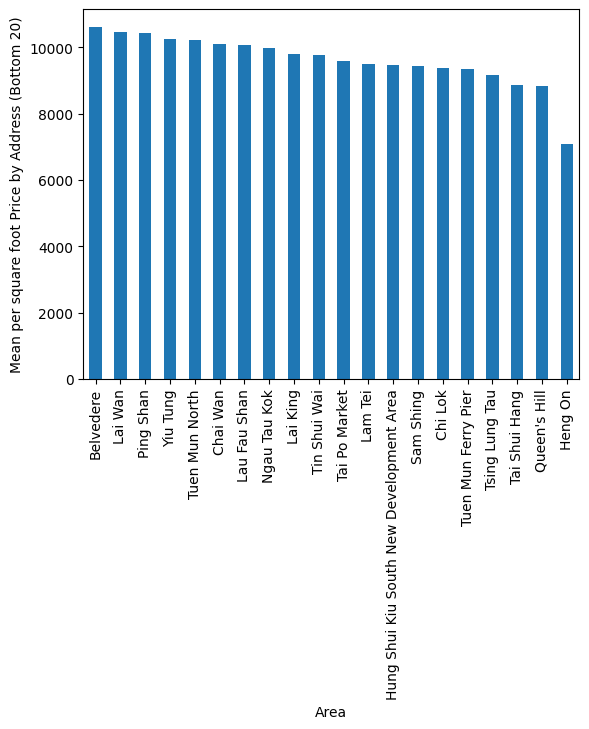

In [7]:
bottom_20_areas = mean_price_by_area.tail(20)

bottom_20_areas.plot(
    kind = "bar",
    xlabel = "Area",
    ylabel = "Mean per square foot Price by Address (Bottom 20)"
);

plt.savefig("images/mean_price_per_sq_foot_by_area_bottom_20.png")

In [8]:
# Location around "Peak" houses:
peak = df[df["address"].str.contains("peak", case=False, na=False)]
peak

,name,room_numbers,address,price,usable_area,gross_floor_area,url,latitude,longitude,price_per_sq_foot_SA,price_per_sq_foot_GFA
9558,La Hacienda・BLOCK B,Middle Floor・2 Rooms・(2 Suites),Peak,79000000.0,2643.0,2820.0,https://hk.centanet.com/findproperty/en/detail/La-Hacienda-BLOCK-B_TEH132?theme=buy,NaN,NaN,29890.276201,28014.184397
9974,MOUNT KELLETT ROAD,HOUSE 9・3 Rooms,Peak,90000000.0,1690.0,2300.0,https://hk.centanet.com/findproperty/en/detail/MOUNT-KELLETT-ROAD_TEA155?theme=buy,NaN,NaN,53254.437870,39130.434783
9990,Infinity・BLOCK A1,3 Rooms,Peak,138000000.0,2061.0,2980.0,https://hk.centanet.com/findproperty/en/detail/Infinity-BLOCK-A1_TEJ929?theme=buy,NaN,NaN,66957.787482,46308.724832
9993,VIVIAN COURT,5 Rooms・(1 Suite),Peak,78000000.0,1104.0,NaN,https://hk.centanet.com/findproperty/en/detail/VIVIAN-COURT_TEH545?theme=buy,NaN,NaN,70652.173913,NaN
9997,Infinity,3 Rooms,Peak,180000000.0,2061.0,2980.0,https://hk.centanet.com/findproperty/en/detail/Infinity_TEJ933?theme=buy,NaN,NaN,87336.244541,60402.684564


In [9]:
# Location around "Peak" houses: 
print("The URLs for houses around Peak: ")
peak["url"]

The URLs for houses around Peak: 


9558    https://hk.centanet.com/findproperty/en/detail/La-Hacienda-BLOCK-B_TEH132?theme=buy
9974     https://hk.centanet.com/findproperty/en/detail/MOUNT-KELLETT-ROAD_TEA155?theme=buy
9990      https://hk.centanet.com/findproperty/en/detail/Infinity-BLOCK-A1_TEJ929?theme=buy
9993           https://hk.centanet.com/findproperty/en/detail/VIVIAN-COURT_TEH545?theme=buy
9997               https://hk.centanet.com/findproperty/en/detail/Infinity_TEJ933?theme=buy
Name: url, dtype: object

In [10]:
# Location around Heng on houses:
heng_on = df[df["address"].str.contains("Heng On", case=False, na=False)]
print(heng_on.shape)
heng_on

(3, 11)


,name,room_numbers,address,price,usable_area,gross_floor_area,url,latitude,longitude,price_per_sq_foot_SA,price_per_sq_foot_GFA
13,Heng On Estate・Heng Hoi House (Block 4),Middle Floor・FLAT 14・2 Rooms,Heng On,2100000.0,443.0,NaN,https://hk.centanet.com/findproperty/en/detail/Heng-On-Estate-Heng-Hoi-House-(Block-4)_EGT634?theme=buy,NaN,NaN,4740.406321,NaN
37,Heng On Estate・Heng Fung House (Block 3),High Floor・FLAT 7・2 Rooms,Heng On,2600000.0,443.0,NaN,https://hk.centanet.com/findproperty/en/detail/Heng-On-Estate-Heng-Fung-House-(Block-3)_EGW531?theme=buy,NaN,NaN,5869.074492,NaN
1488,KAM ON COURT・PO ON HOUSE (BLOCK C),2 Rooms,Heng On,4280000.0,401.0,512.0,https://hk.centanet.com/findproperty/en/detail/KAM-ON-COURT-PO-ON-HOUSE-(BLOCK-C)_EGE540?theme=buy,NaN,NaN,10673.316708,8359.375


In [11]:
# Location around Heng on houses:
print("The URLs for houses around Heng On: ")
heng_on["url"]

The URLs for houses around Heng On: 


13       https://hk.centanet.com/findproperty/en/detail/Heng-On-Estate-Heng-Hoi-House-(Block-4)_EGT634?theme=buy
37      https://hk.centanet.com/findproperty/en/detail/Heng-On-Estate-Heng-Fung-House-(Block-3)_EGW531?theme=buy
1488          https://hk.centanet.com/findproperty/en/detail/KAM-ON-COURT-PO-ON-HOUSE-(BLOCK-C)_EGE540?theme=buy
Name: url, dtype: object

### Scatter plot to see the relation between price per sq foot and house size

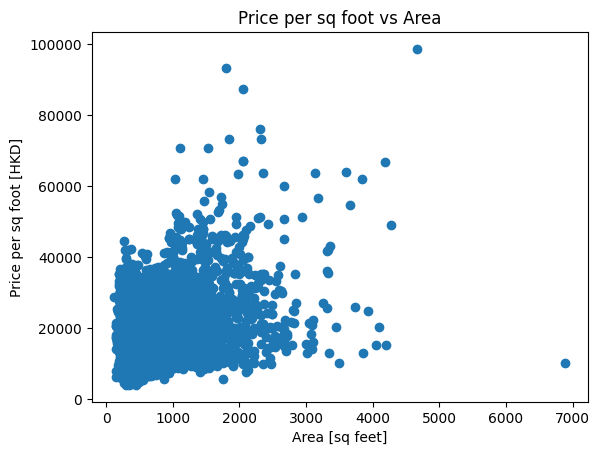

In [12]:
# Scatter plot of "price_per_sq_foot_SA" vs "usable_area"
plt.scatter(x = df["usable_area"], y = df["price_per_sq_foot_SA"])
plt.xlabel("Area [sq feet]")
plt.ylabel("Price per sq foot [HKD]")
plt.title("Price per sq foot vs Area");

plt.savefig("images/price_per_sq_foot_vs_area_scatter.png")

In [13]:
# Investigate the house that has over 6000 sq feet
usable_area_over_6000 = df[df["usable_area"] > 6000]
usable_area_over_6000
usable_area_over_6000["url"]

1099    https://hk.centanet.com/findproperty/en/detail/Mayfair-By-The-Sea-II-Tower-7_ASQ361?theme=buy
Name: url, dtype: object

In [14]:
# Calculate the correlation between "price_per_sq_foot_SA" and "usable_area"
p_correlation = df["price_per_sq_foot_SA"].corr(df["usable_area"])
print(f"The correlation between price per sq foot and usable area is: {p_correlation}")

# Correlation between "price" and "usable_area"
print(f"The correlation between total selling price and usable area is: {df["price"].corr(df["usable_area"])}")

The correlation between price per sq foot and usable area is: 0.36614298909956816
The correlation between total selling price and usable area is: 0.7985500707173342


### Subsetting

In [15]:
# Create a new df for address == "Mid-Levels West" 
df_mid_levels_west = df[df["address"] == "Mid-Levels West"]

print(type(df_mid_levels_west))
print(df_mid_levels_west.shape)
df_mid_levels_west.head()

<class 'pandas.core.frame.DataFrame'>
(420, 11)


,name,room_numbers,address,price,usable_area,gross_floor_area,url,latitude,longitude,price_per_sq_foot_SA,price_per_sq_foot_GFA
2053,GOLDEN VALLEY MANSION,Low Floor,Mid-Levels West,6500000.0,573.0,726.0,https://hk.centanet.com/findproperty/en/detail/GOLDEN-VALLEY-MANSION_LIQ580?theme=buy,22.28396,114.143959,11343.804538,8953.168044
2188,BONHAM ROAD,NaN,Mid-Levels West,5980000.0,520.0,NaN,https://hk.centanet.com/findproperty/en/detail/BONHAM-ROAD_LCJ167?theme=buy,22.28396,114.143959,11500.000000,NaN
2385,CAINE ROAD,Middle Floor・2 Rooms,Mid-Levels West,8600000.0,733.0,NaN,https://hk.centanet.com/findproperty/en/detail/CAINE-ROAD_LCH875?theme=buy,22.28396,114.143959,11732.605730,NaN
2848,CASTLE LANE,FLAT A・2 Rooms,Mid-Levels West,5200000.0,422.0,NaN,https://hk.centanet.com/findproperty/en/detail/CASTLE-LANE_LAJ280?theme=buy,22.28396,114.143959,12322.274882,NaN
3156,HING WAH MANSION,3 Rooms,Mid-Levels West,9900000.0,781.0,920.0,https://hk.centanet.com/findproperty/en/detail/HING-WAH-MANSION_LBF910?theme=buy,22.28396,114.143959,12676.056338,10760.869565


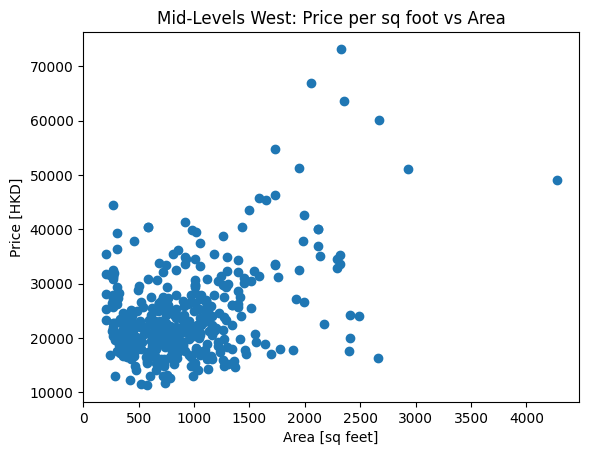

In [16]:
# Scatter plot of "price_per_sq_foot_SA" vs "usable_area"
plt.scatter(x = df_mid_levels_west["usable_area"], y = df_mid_levels_west["price_per_sq_foot_SA"])
plt.xlabel("Area [sq feet]")
plt.ylabel("Price [HKD]")
plt.title("Mid-Levels West: Price per sq foot vs Area");

plt.savefig("images/mid_levels_west_price_per_sq_foot_vs_area_scatter.png")

In [17]:
# Correlation 
p_correlation = df_mid_levels_west["price_per_sq_foot_SA"].corr(df_mid_levels_west["usable_area"])
print(f"The correlation between price per sq foot and usable area is: {p_correlation}")

# Price vs Area
print(f"The correlation between total selling price and usable area is: {df_mid_levels_west["price"].corr(df_mid_levels_west["usable_area"])}")

The correlation between price per sq foot and usable area is: 0.42608456312283133
The correlation between total selling price and usable area is: 0.8573287528673929


In [18]:
# Create a new df for address == "Tseung Kwan O" 
df_tseung_kwan_o = df[df["address"] == "Tseung Kwan O"]

print(type(df_tseung_kwan_o))
print(df_tseung_kwan_o.shape)
df_tseung_kwan_o.head()

<class 'pandas.core.frame.DataFrame'>
(397, 11)


,name,room_numbers,address,price,usable_area,gross_floor_area,url,latitude,longitude,price_per_sq_foot_SA,price_per_sq_foot_GFA
52,Po Ming Court・Po Pak House (Block B),Low Floor・FLAT 17・2 Rooms,Tseung Kwan O,2650000.0,426.0,NaN,https://hk.centanet.com/findproperty/en/detail/Po-Ming-Court-Po-Pak-House-(Block-B)_SBT464?theme=buy,22.308911,114.263557,6220.657277,NaN
191,Beverly Garden・Block 7,Low Floor・FLAT K・2 Rooms,Tseung Kwan O,3450000.0,431.0,NaN,https://hk.centanet.com/findproperty/en/detail/Beverly-Garden-Block-7_SBA830?theme=buy,22.308911,114.263557,8004.640371,NaN
203,KWONG MING COURT・KWONG YIN HOUSE (BLOCK C),FLAT 6・2 Rooms,Tseung Kwan O,3500000.0,433.0,NaN,https://hk.centanet.com/findproperty/en/detail/KWONG-MING-COURT-KWONG-YIN-HOUSE-(BLOCK-C)_SBS254?theme=buy,22.308911,114.263557,8083.140878,NaN
208,CHOI MING COURT・CHOI TO HOUSE (BLOCK E),FLAT 7・2 Rooms,Tseung Kwan O,4100000.0,506.0,NaN,https://hk.centanet.com/findproperty/en/detail/CHOI-MING-COURT-CHOI-TO-HOUSE-(BLOCK-E)_SDO502?theme=buy,22.308911,114.263557,8102.766798,NaN
219,Kwong Ming Court・Kwong Ying House (Block E),Middle Floor・FLAT 1・3 Rooms,Tseung Kwan O,5200000.0,639.0,NaN,https://hk.centanet.com/findproperty/en/detail/Kwong-Ming-Court-Kwong-Ying-House-(Block-E)_SBP562?theme=buy,22.308911,114.263557,8137.715180,NaN


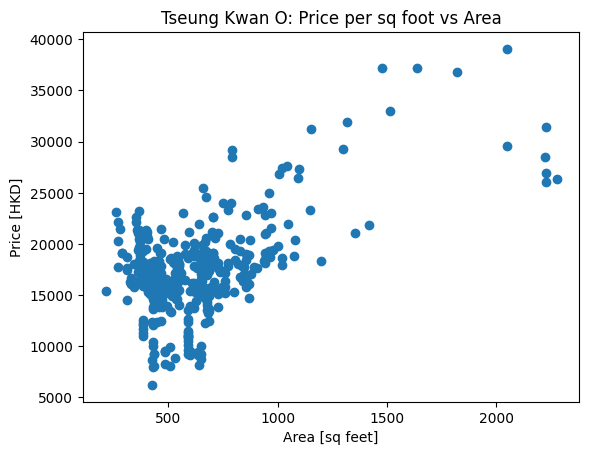

In [19]:
# Scatter plot of "price_per_sq_foot_SA" vs "usable_area"
plt.scatter(x = df_tseung_kwan_o["usable_area"], y = df_tseung_kwan_o["price_per_sq_foot_SA"])
plt.xlabel("Area [sq feet]")
plt.ylabel("Price [HKD]")
plt.title("Tseung Kwan O: Price per sq foot vs Area");

plt.savefig("images/tseung_kwan_o_price_per_sq_foot_vs_area_scatter.png")

In [20]:
# Correlation 
p_correlation = df_tseung_kwan_o["price_per_sq_foot_SA"].corr(df_tseung_kwan_o["usable_area"])
print(f"The correlation between price per sq foot and usable area is: {p_correlation}")

# Price vs Area
print(f"The correlation between total selling price and usable area is: {df_tseung_kwan_o["price"].corr(df_tseung_kwan_o["usable_area"])}")

The correlation between price per sq foot and usable area is: 0.5762721675465965
The correlation between total selling price and usable area is: 0.9385536171474982
